In [1]:
#################
###  Imports  ###
#################

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models
from tensorflow.keras import layers

# Deep Learning week - Day 1 - Exercise 4


The overall objective of this exercise is to predict the house pricing in the Boston area (USA) based on the input features. This will be done with a Neural Network.

The intention of this exercise is to :
- prepare the data for a NN (Neural Network)
- train a _regression_ NN
- check the NN loss during the training and adapt accordingly
- select the hyperparameters of the NN

# Data

We will predict the price of houses in Boston and suburbs, based on input variables as the is the pupil-teacher ratio (in the related town), nitric oxides concentration, the crime rate per capita or the weighted distances to five Boston employment centers.

You can check additional information about the dataset here https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

This classic dataset is provided in the Keras library. It can be loaded as follows : 

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

`shape` is an interesting attribute of the data object. It gives the (row, column) shape of the data.

In [3]:
print("Size of training data: {}".format(X_train.shape))
print("Size of test data: {}".format(X_test.shape))

Size of training data: (404, 13)
Size of test data: (102, 13)


❓ **Question** ❓ What kind of Machine Learning is this problem related to? Supervised, regression, unsupervised, clustering, classification, ... ?

In [4]:
##############
### Answer ###
##############

### This a regression task


For reason we will see during the week, it is important to center and normalize the data so that they are centered around 0 with a variance of 1. 

❓ **Question** ❓ Use the StandardScaler from scikit learn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to standardise the data 

Warning : Use it wisely on the train and test set. _Hint_ : you can check what was done on the multiclass classification tutorial.

In [4]:
##############
### Answer ###
##############

SScaler = StandardScaler()
SScaler.fit(X_train)

X_train = SScaler.transform(X_train)
X_test = SScaler.transform(X_test)


❓ **Question** ❓ Plot each of your variable within the train set to check that it is somehow centered around 0 with small variance

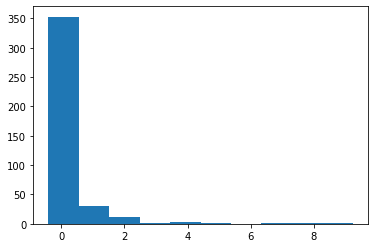

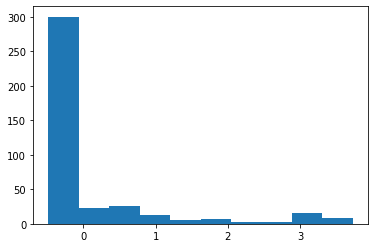

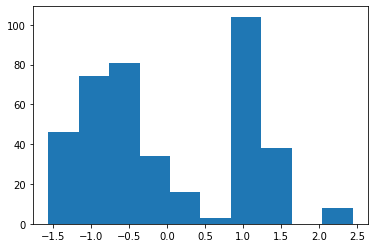

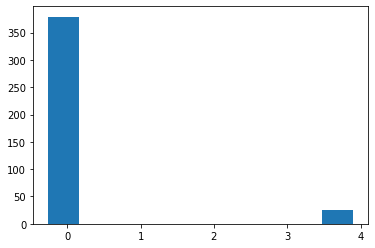

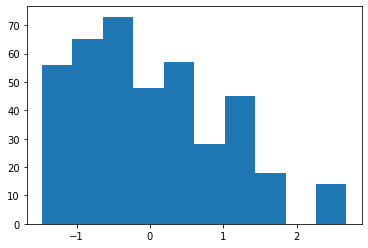

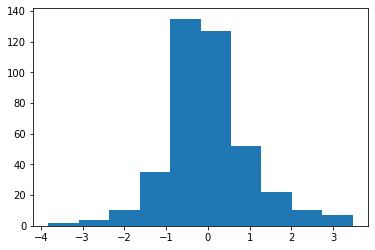

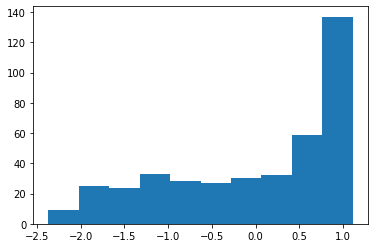

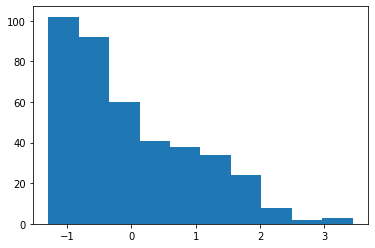

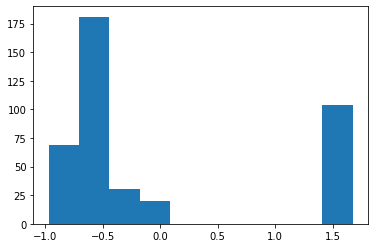

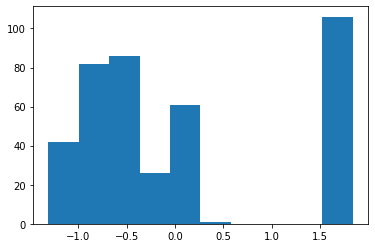

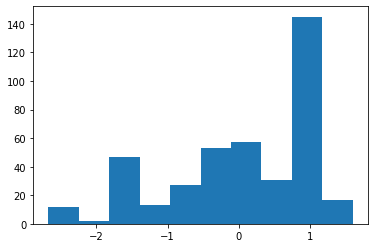

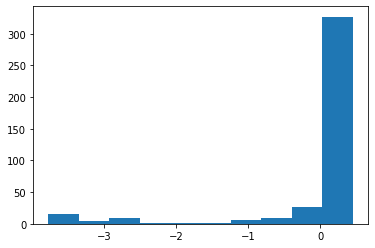

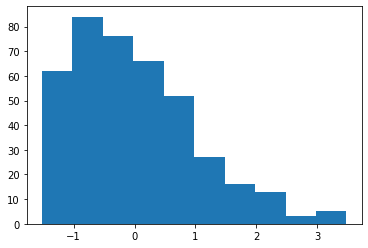

In [5]:
##############
### Answer ###
##############

for i in X_train.T:
    plt.hist(i)
    plt.show()

## Model


Now that we have the data, we will define a first architecture and run the model 

❓ **Question** ❓ Initialize a model which has 
- a first layer with 64 neurons (do not forget the activation and the input dim
- a second layer with 32 neurons
- a final layer that outputs a predicted value 

Hint : in the case of a regression, your final layer will look similar to `layers.Dense(SOME_NUMBER, activation='linear')` where `SOME_NUMBER` corresponds to the dimension of the output you want to predict.

In [ ]:
def initialize_model():

    ### Model architecture
    # To complete
    # To complete
    # To complete
    # To complete
    
    
    # Model optimization : Optimized, loss and metric
    model.compile(optimizer='adam',
                  loss='mse',       # MSE stands for Mean Square Error
                  metrics=['mae'])  # MAE stands for Mean Absolute Error
    
    return model


model = initialize_model()

In [8]:
##############
### Answer ###
##############

def initialize_model():

    ### Model architecture
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_dim=13))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    
    
    # Model optimization : Optimized, loss and metric to 
    model.compile(optimizer='adam',
                  loss='mse',       # MSE stands for Mean Square Error
                  metrics=['mae'])  # MAE stands for Mean Absolute Error
    
    return model


model = initialize_model()

❓ **Question** ❓ What can you say about the loss and the metrics?

In [ ]:
##############
### Answer ###
##############

### As this is not a classification problem, the loss is different. Similarly, the accuracy has no meaning 
### for a regression problem. Here, we can look at the Mean Absolute Error to know whether our prediction is good or not. 

❓ **Question** ❓ Run the model on the train data. As in the previous exercise, add `validation_data=(X_test, y_test)` to check the MAE and MSE value on the test set during the iterations
and plot the history on the train and test set.

In [9]:
def plot_loss_mae(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

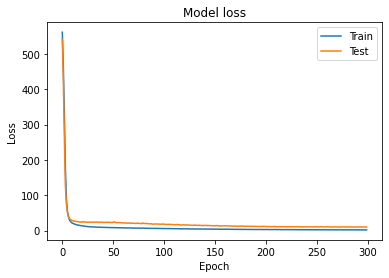

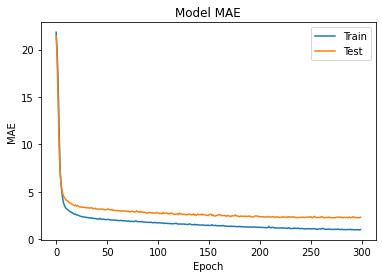

In [10]:
##############
### Answer ###
##############

model = initialize_model()

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=300,
                    batch_size=16,
                    verbose=0)

plot_loss_mae(history)

❓ **Question** ❓ Try some architecture of your own to get the best possible MAE. (We will see tomorrow how to avoid the overfitting). Especially, you can try to :

- Change the number of layers
- Change the number of neurons in each layer
- Change the activation function within each layer